In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.factorplots

%matplotlib inline

## Matplotlib

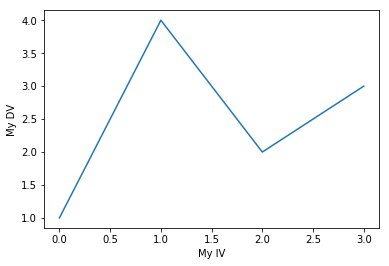

In [2]:
plt.plot([1, 4, 2, 3])
plt.xlabel('My IV')
plt.ylabel('My DV')
plt.show()

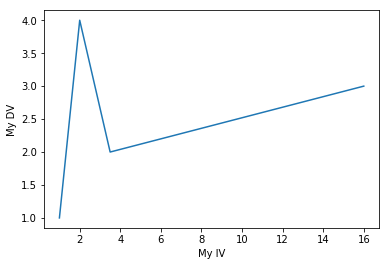

In [5]:
plt.plot([1, 2, 3.5, 16], [1, 4, 2, 3])
plt.xlabel('My IV')
plt.ylabel('My DV')
plt.show()

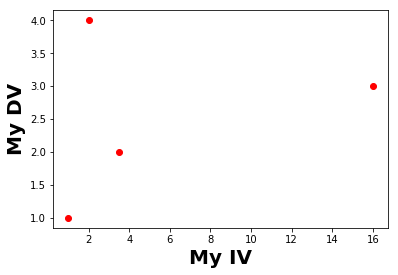

In [14]:
plt.plot([1, 2, 3.5, 16], [1, 4, 2, 3], 'ro')
plt.xlabel('My IV', fontsize=20, fontweight='bold')
plt.ylabel('My DV', fontsize=20, fontweight='bold')
plt.show()

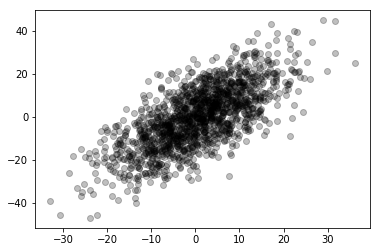

In [19]:
np.random.seed(5)

n_points = 150

x = np.random.normal(0, 10, n_points)
y = x + np.random.normal(0, 10, n_points)

plt.plot(x, y, 'ko', alpha=0.99)

<BarContainer object of 3 artists>

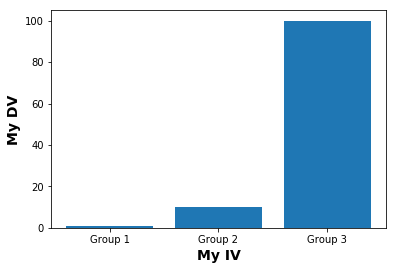

In [20]:
names = ['Group 1', 'Group 2', 'Group 3']
values = [1, 10, 100]
plt.xlabel('My IV', fontsize=14, fontweight='bold')
plt.ylabel('My DV', fontsize=14, fontweight='bold')
plt.bar(names, values)

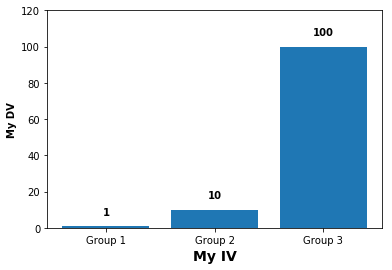

In [24]:
names = ['Group 1', 'Group 2', 'Group 3']
values = [1, 10, 100]
plt.xlabel('My IV', fontsize=14, fontweight='bold')
plt.ylabel('My DV', fontweight='bold')
plt.ylim([0,120])
plt.bar(names, values)

# Make some labels.
labels = [str(i) for i in values]

for x, y, label in zip(range(len(values)), values, labels):
    plt.text(x, y + 5, label, ha='center', va='bottom', fontweight='bold')

## Seaborn

In [25]:
#data = pd.read_csv('./shooter.csv', sep=',', na_values='.')
df = pd.read_csv('./shooter-data/shooter-group.csv', sep=',')
df.head()

,subject,age,stimulus,trial,race,gun,rt,correct,rate
0,34,19,w94,19,0,1,451,1,2.217295
1,34,19,b12,20,1,1,492,1,2.032520
2,34,19,w90,21,0,0,636,1,1.572327
3,34,19,w97,22,0,0,636,1,1.572327
4,34,19,b16,23,1,1,529,1,1.890359


(array([ 22., 129., 322., 601., 761., 700., 437., 273., 164.,  93.]),
 array([349., 399., 449., 499., 549., 599., 649., 699., 749., 799., 849.]),
 <a list of 10 Patch objects>)

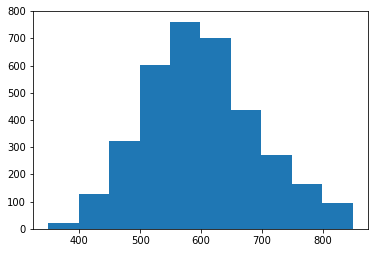

In [26]:
plt.hist(df['rt'])

/home/xian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


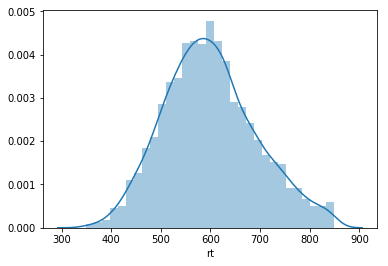

In [27]:
sns.distplot(df['rt'])

/home/xian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


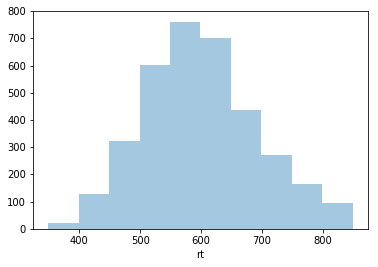

In [30]:
sns.distplot(df['rt'], kde=False, bins=10)

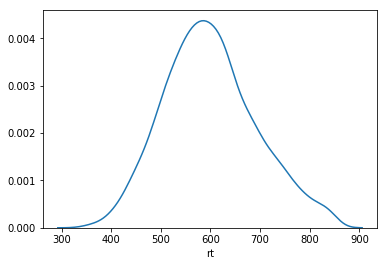

In [31]:
sns.distplot(df['rt'], hist=False)

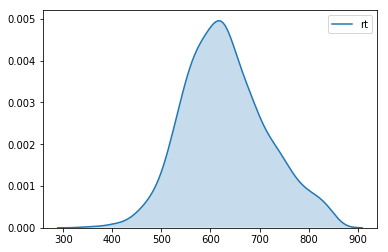

In [34]:
sns.kdeplot(df[df['gun']==0]['rt'], shade=True)

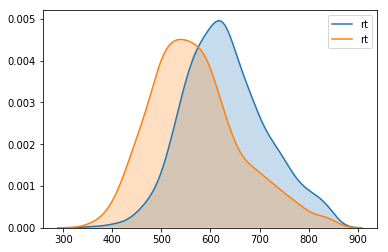

In [35]:
sns.kdeplot(df[df['gun']==0]['rt'], shade=True)
sns.kdeplot(df[df['gun']==1]['rt'], shade=True)

Text(0.5,0,'rt')

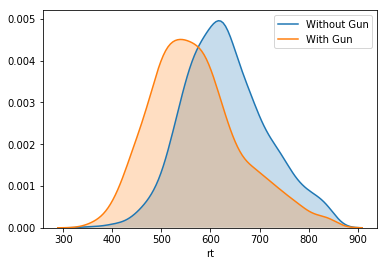

In [36]:
sns.kdeplot(df[df['gun']==0]['rt'], shade=True, label='Without Gun')
sns.kdeplot(df[df['gun']==1]['rt'], shade=True, label='With Gun')
plt.xlabel('rt')

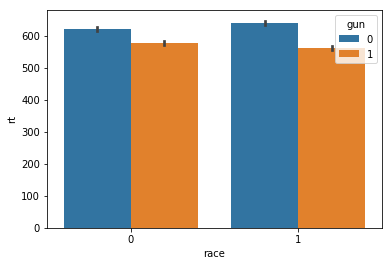

In [37]:
sns.barplot(x='race', y='rt', hue='gun', data=df)

(530, 660)

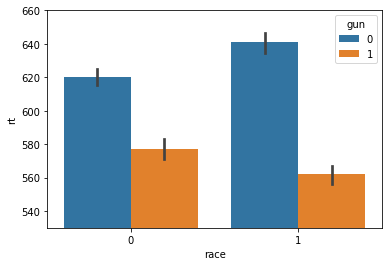

In [38]:
sns.barplot(x='race', y='rt', hue='gun', data=df)
plt.ylim(530, 660)

(0.94, 1)

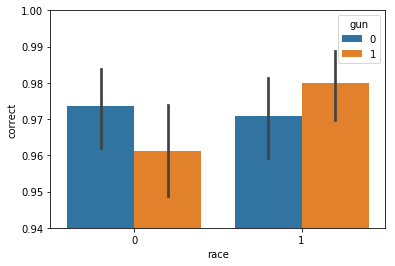

In [39]:
sns.barplot(x='race', y='correct', hue='gun', data=df)
plt.ylim(.94, 1)

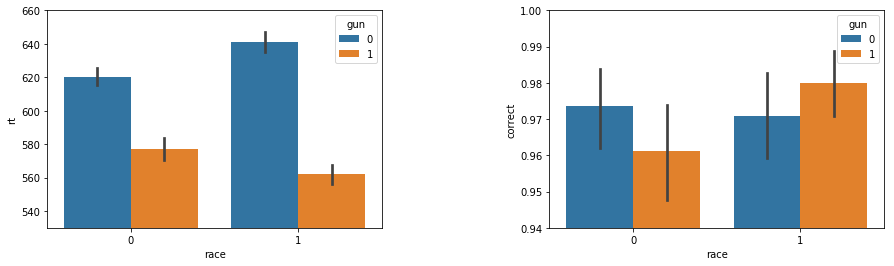

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x='race', y='rt', hue='gun', data=df, ax=ax1)
ax1.set_ylim(530, 660)

sns.barplot(x='race', y='correct', hue='gun', data=df, ax=ax2)
ax2.set_ylim(.94, 1)

plt.subplots_adjust(wspace=.5)
fig.set_figwidth(15)

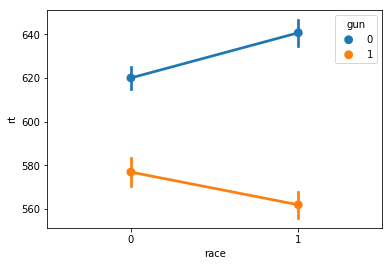

In [41]:
ax = sns.pointplot(x='race', y='rt', hue='gun', data=df)

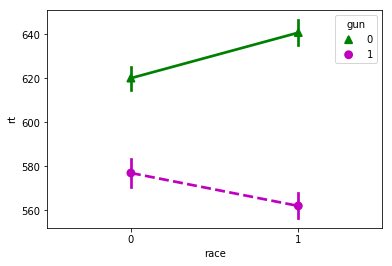

In [42]:
ax = sns.pointplot(x='race', y='rt', hue='gun', data=df, palette={0: 'g', 1: 'm'}, markers=['^', 'o'], linestyles=['-', '--'])

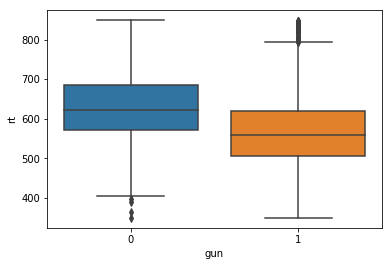

In [43]:
sns.boxplot(x='gun', y='rt', data=df)

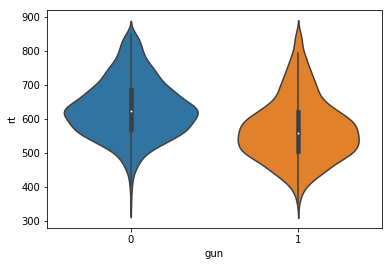

In [44]:
sns.violinplot(x='gun', y='rt', data=df)

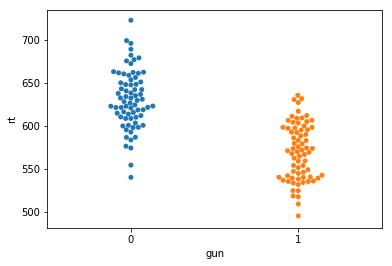

In [45]:
subject_data = df.groupby(['subject', 'gun', 'race'], as_index=False).mean()
sns.swarmplot(x=subject_data['gun'], y=subject_data['rt'], data=subject_data)

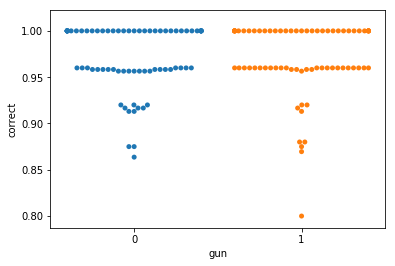

In [46]:
subject_data = df.groupby(['subject', 'gun', 'race', 'age'], as_index=False).mean()
sns.swarmplot(x=subject_data['gun'], y=subject_data['correct'], data=subject_data)

/home/xian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


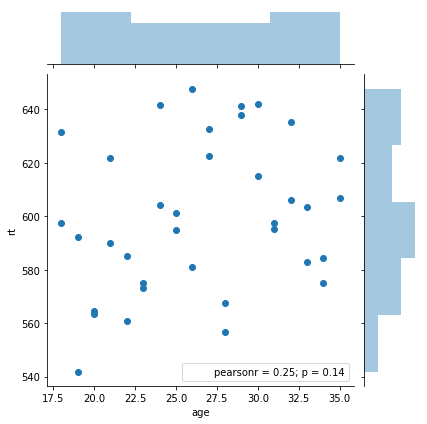

In [47]:
sns.jointplot(x='age', y='rt', data=df.groupby(['subject']).mean())

/home/xian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/xian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


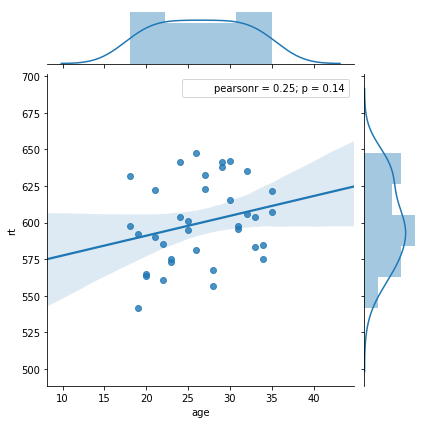

In [48]:
sns.jointplot(x='age', y='rt', data=df.groupby(['subject']).mean(), kind='reg')

## Regression plots

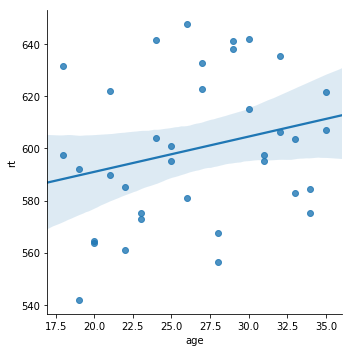

In [49]:
sns.lmplot(x='age', y='rt', data=df.groupby(['subject']).mean())

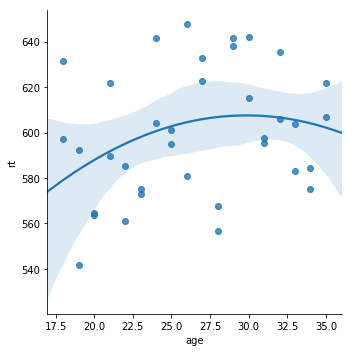

In [50]:
sns.lmplot(x='age', y='rt', order=2, data=df.groupby(['subject']).mean())

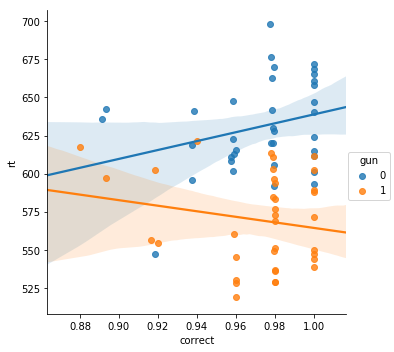

In [51]:
sns.lmplot(x='correct', y='rt', hue='gun', data=df.groupby(['subject', 'gun'], as_index=False).mean())

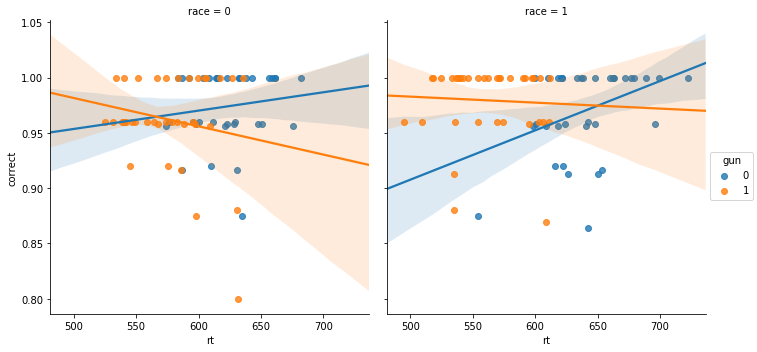

In [52]:
sns.lmplot(x='rt', y='correct', col='race', hue='gun', data=df.groupby(['subject', 'race', 'gun'], as_index=False).mean())

## ggplot

In [ ]:
ggplot(aes(x='date', y='beef'), data=meat) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.2)